In [1]:
import pandas as pd

In [172]:
sales=pd.read_csv(r"/home/rgukt/Downloads/SuperMarket Analysis.csv")

In [173]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [38]:
# Which product line generates the highest total revenue?
# sales.groupby("Product line")["Sales"].sum().sort_values(ascending=False).head(1)
sales.groupby("Product line")["Sales"].sum().sort_values(ascending=False).index[0]

'Food and beverages'

In [39]:
# What are the busiest hours of the day?
sales["Time"].dtype

dtype('O')

In [40]:
sales["Time"]=pd.to_datetime(sales["Time"], format="%I:%M:%S %p")

In [24]:
# sales["Time"] = sales['Time'].dt.strftime('%H:%M:%S')
# sales["Time"]

0      13:08:00
1      10:29:00
2      13:23:00
3      20:33:00
4      10:37:00
         ...   
995    13:46:00
996    17:16:00
997    13:22:00
998    15:33:00
999    13:28:00
Name: Time, Length: 1000, dtype: object

In [33]:
sales["Time"]

0      13:08:00
1      10:29:00
2      13:23:00
3      20:33:00
4      10:37:00
         ...   
995    13:46:00
996    17:16:00
997    13:22:00
998    15:33:00
999    13:28:00
Name: Time, Length: 1000, dtype: object

In [43]:
sales["Hours"]=sales["Time"].dt.hour
sales["Hours"].dtype

dtype('int32')

In [50]:
busiest_hours=sales["Hours"].value_counts().sort_values(ascending=False).head(5)
busiest_hours

Hours
19    113
13    103
15    102
10    101
18     93
Name: count, dtype: int64

In [51]:
busiest_hours=sales["Hours"].value_counts().sort_index()
busiest_hours

Hours
10    101
11     90
12     89
13    103
14     83
15    102
16     77
17     74
18     93
19    113
20     75
Name: count, dtype: int64

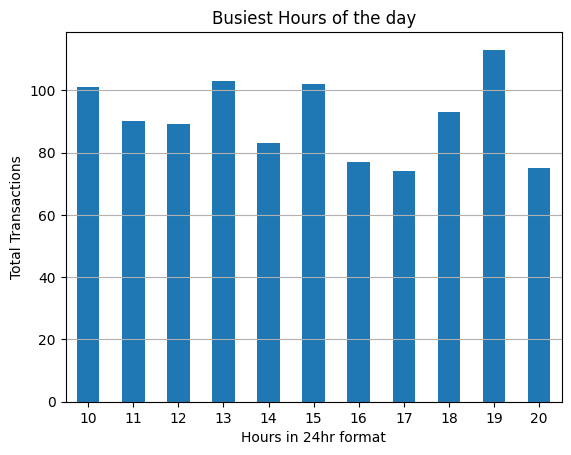

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
busiest_hours.plot(kind="bar")
plt.xlabel("Hours in 24hr format")
plt.ylabel("Total Transactions")
plt.title("Busiest Hours of the day")
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

In [56]:
# Which branch gives the highest gross income on average?
sales.groupby("Branch")["gross income"].mean().sort_values(ascending=False)

Branch
Giza     16.052367
Cairo    15.232024
Alex     14.874001
Name: gross income, dtype: float64

<Axes: xlabel='Branch'>

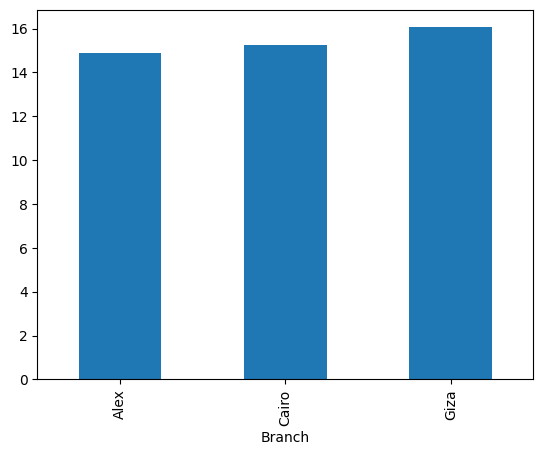

In [57]:
sales.groupby("Branch")["gross income"].mean().plot(kind="bar")

In [60]:
# Do males or females spend more?
sales.groupby("Gender")["Sales"].sum().sort_values(ascending=False).index[0]

'Female'

In [64]:
# Which payment method is used most often?
sales["Payment"].value_counts().sort_values(ascending=False).index[0]

'Ewallet'

Text(0, 0.5, 'Frequency of Usage')

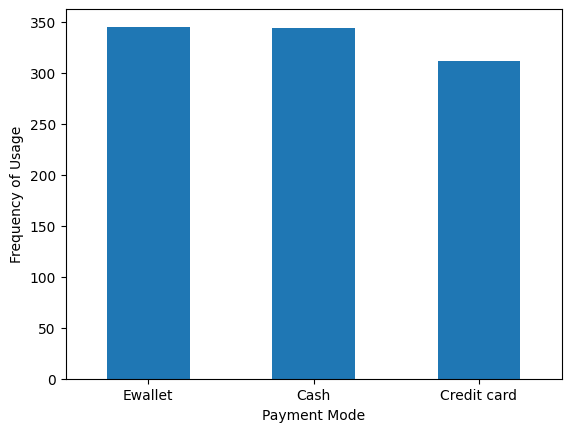

In [66]:
sales["Payment"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.xlabel("Payment Mode")
plt.ylabel("Frequency of Usage")

In [71]:
# Is there a relationship between rating and total bill?
sales["Sales"].corr(sales["Rating"])

np.float64(-0.03644170499701835)

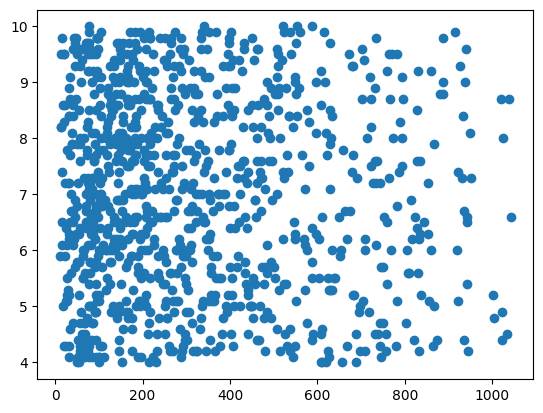

In [73]:
plt.scatter(sales["Sales"],sales["Rating"])


In [75]:
# What’s the average gross income per city?
sales.groupby("City")["gross income"].mean()

City
Mandalay     15.232024
Naypyitaw    16.052367
Yangon       14.874001
Name: gross income, dtype: float64

In [78]:
# Which product line has the highest average rating?
sales.groupby("Product line")["Rating"].mean().sort_values(ascending=False).index[0]

'Food and beverages'

**TITANIC DATASET**

In [84]:
import seaborn as sns


In [86]:
df=sns.load_dataset("titanic")
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [94]:
# What is the overall survival rate?
(df[df["survived"]==1].shape[0]/df.shape[0])*100

38.38383838383838

In [99]:
# Does gender influence survival?
df.groupby("who")["survived"].mean()

who
child    0.590361
man      0.163873
woman    0.756458
Name: survived, dtype: float64

<Axes: xlabel='who', ylabel='survived'>

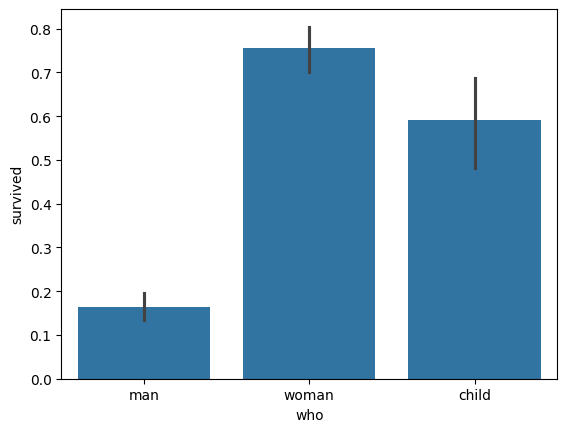

In [100]:
sns.barplot(data=df,x="who",y="survived")

In [101]:
# Does class (pclass) affect survival rate?
df["pclass"].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

Text(0.5, 1.0, 'Survival Rate by Pclass')

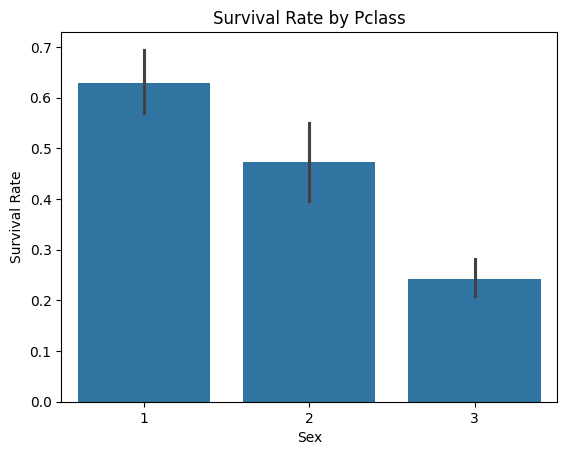

In [105]:
# df.groupby("pclass")["survived"].mean().plot(kind="bar")
sns.barplot(data=df,x="pclass",y="survived")
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Pclass")

In [109]:
# What is the average age of passengers who survived?
df[df["survived"]==1]["age"].mean()

np.float64(28.343689655172415)

In [115]:
# Which embarkation point had the highest number of survivors?
df[df["survived"]==1].groupby("embarked")["survived"].count()

embarked
C     93
Q     30
S    217
Name: survived, dtype: int64

In [117]:
# What is the distribution of age by survival status?
df.groupby("survived")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


<Axes: xlabel='age', ylabel='Count'>

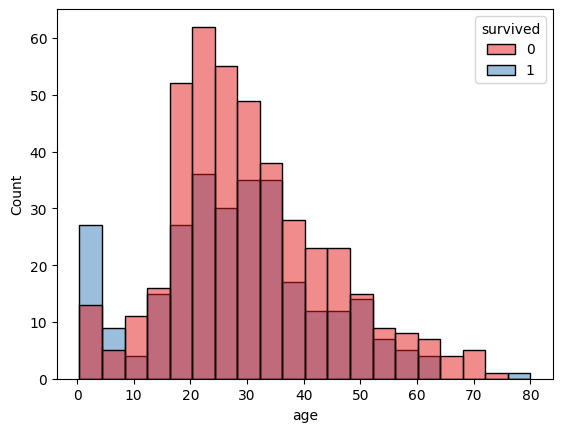

In [121]:
sns.histplot(data=df,x="age",hue="survived",kde=False,palette="Set1")

<Axes: xlabel='age', ylabel='Density'>

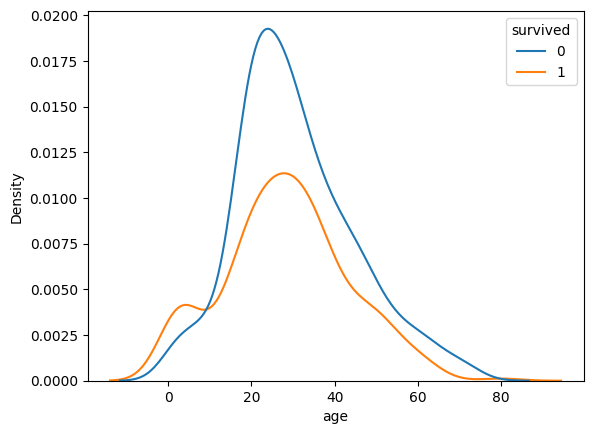

In [125]:
sns.kdeplot(data=df,x="age",hue="survived")

In [126]:
# Which age group had the highest survival rate?
df.groupby("age")["survived"].mean()

age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: survived, Length: 88, dtype: float64

In [128]:
bins = [0, 12, 18, 35, 60, 120]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [130]:
survival_age_group=df.groupby("AgeGroup")["survived"].mean()
survival_age_group

/tmp/ipykernel_108519/3523027246.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_age_group=df.groupby("AgeGroup")["survived"].mean()


AgeGroup
Child          0.573529
Teen           0.488889
Young Adult    0.368852
Adult          0.416268
Senior         0.269231
Name: survived, dtype: float64

<Axes: xlabel='AgeGroup'>

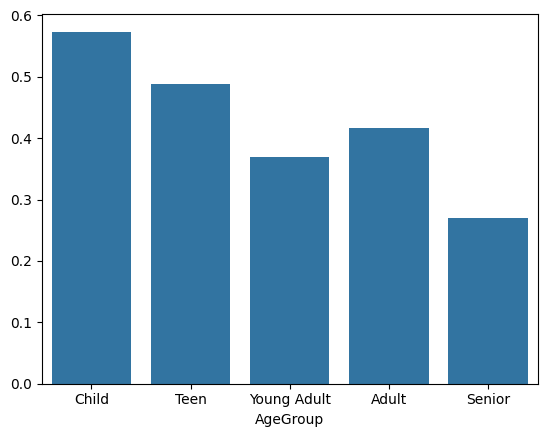

In [131]:
sns.barplot(x=survival_age_group.index,y=survival_age_group.values)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Child'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Young Adult'),
  Text(3, 0, 'Adult'),
  Text(4, 0, 'Senior')])

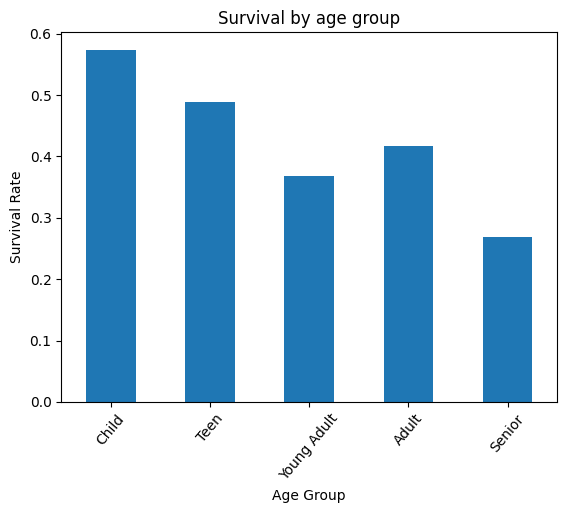

In [136]:
survival_age_group.plot(kind="bar")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.title("Survival by age group")
plt.xticks(rotation=50)

In [137]:
# Does fare correlate with survival?
df["fare"].corr(df["survived"])

np.float64(0.2573065223849625)

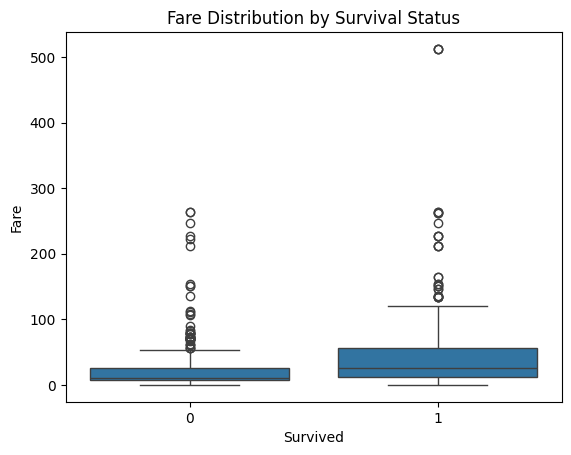

In [142]:
sns.boxplot(x='survived', y='fare', data=df)
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

**NETFLIX DATASET PRACTICE**

In [174]:
netflix=pd.read_csv(r"/home/rgukt/Downloads/netflix_titles.csv")
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [175]:
# What type of content (Movie or TV Show) is more common?
netflix["type"].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [176]:
# Which country has the most content?
netflix["country"].value_counts()

country
United States                                                      2818
India                                                               972
United Kingdom                                                      419
Japan                                                               245
South Korea                                                         199
                                                                   ... 
Mexico, United States, Spain, Colombia                                1
Canada, Norway                                                        1
Finland, Germany, Belgium                                             1
Argentina, United States, Mexico                                      1
United Kingdom, United States, Germany, Denmark, Belgium, Japan       1
Name: count, Length: 748, dtype: int64

In [209]:
# What are the most common genres on Netflix?
netflix["listed_in"]

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object

In [211]:
genres=netflix["listed_in"].dropna().str.split(",")
genres

0                                         [Documentaries]
1       [International TV Shows,  TV Dramas,  TV Myste...
2       [Crime TV Shows,  International TV Shows,  TV ...
3                               [Docuseries,  Reality TV]
4       [International TV Shows,  Romantic TV Shows,  ...
                              ...                        
8802                   [Cult Movies,  Dramas,  Thrillers]
8803           [Kids' TV,  Korean TV Shows,  TV Comedies]
8804                           [Comedies,  Horror Movies]
8805                [Children & Family Movies,  Comedies]
8806    [Dramas,  International Movies,  Music & Music...
Name: listed_in, Length: 8807, dtype: object

In [213]:
flat_genres=[genre for sublist in genres for genre in sublist]
flat_genres

['Documentaries',
 'International TV Shows',
 ' TV Dramas',
 ' TV Mysteries',
 'Crime TV Shows',
 ' International TV Shows',
 ' TV Action & Adventure',
 'Docuseries',
 ' Reality TV',
 'International TV Shows',
 ' Romantic TV Shows',
 ' TV Comedies',
 'TV Dramas',
 ' TV Horror',
 ' TV Mysteries',
 'Children & Family Movies',
 'Dramas',
 ' Independent Movies',
 ' International Movies',
 'British TV Shows',
 ' Reality TV',
 'Comedies',
 ' Dramas',
 'Crime TV Shows',
 ' Docuseries',
 ' International TV Shows',
 'Crime TV Shows',
 ' International TV Shows',
 ' TV Action & Adventure',
 'Dramas',
 ' International Movies',
 'Children & Family Movies',
 ' Comedies',
 'British TV Shows',
 ' Crime TV Shows',
 ' Docuseries',
 'TV Comedies',
 ' TV Dramas',
 'Documentaries',
 ' International Movies',
 'Crime TV Shows',
 ' Spanish-Language TV Shows',
 ' TV Dramas',
 'Thrillers',
 'International TV Shows',
 ' Spanish-Language TV Shows',
 ' TV Action & Adventure',
 'Crime TV Shows',
 ' Docuseries',
 ' 

In [218]:
from collections import Counter
pd.Series(Counter(flat_genres)).sort_values(ascending=False)

 International Movies        2624
Dramas                       1600
Comedies                     1210
Action & Adventure            859
Documentaries                 829
                             ... 
Romantic Movies                 3
Spanish-Language TV Shows       2
LGBTQ Movies                    1
TV Sci-Fi & Fantasy             1
Sports Movies                   1
Length: 73, dtype: int64

In [179]:
# How many movies were released each year?
netflix.head(2)
netflix["release_year"].value_counts()
netflix.groupby("release_year")["title"].count()

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: title, Length: 74, dtype: int64

<Axes: xlabel='release_year', ylabel='Count'>

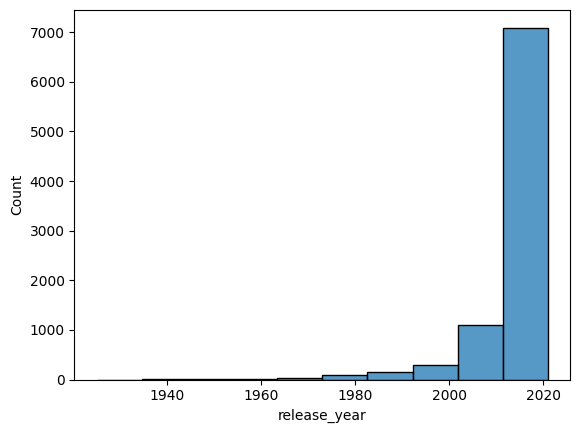

In [180]:
sns.histplot(data=netflix,x="release_year",bins=10)

In [181]:
# What is the average duration of TV shows?
netflix.head(2)
duration=pd.to_numeric(netflix[netflix["type"]=="TV Show"]["duration"].str.extract(r"(\d+)")[0],errors='coerce')

In [182]:
duration.mean()

np.float64(1.764947683109118)

In [183]:
# What is the average duration of Movies?
netflix.head(2)
duration=pd.to_numeric(netflix[netflix["type"]=="Movie"]["duration"].str.extract(r"(\d+)")[0],errors='coerce')

In [184]:
duration.mean()

np.float64(99.57718668407311)

In [185]:
# Which countries produce the longest movies?
movies=netflix[netflix["type"]=="Movie"].copy()
movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [186]:
movies["duration"]=pd.to_numeric(movies["duration"].str.extract(r"(\d+)")[0], errors="coerce")
movies["duration"]

0        90.0
6        91.0
7       125.0
9       104.0
12      127.0
        ...  
8801     96.0
8802    158.0
8804     88.0
8805     88.0
8806    111.0
Name: duration, Length: 6131, dtype: float64

In [188]:
movies.groupby("country")["duration"].mean().sort_values(ascending=False)

country
United Kingdom, United States, Japan                   208.0
United States, United Kingdom, Morocco                 205.0
United States, Italy, United Kingdom, Liechtenstein    200.0
New Zealand, United States                             190.0
Romania, France, Switzerland, Germany                  186.0
                                                       ...  
Namibia                                                 29.0
United Kingdom, Kenya                                   28.0
Georgia                                                 24.0
France, South Korea, Japan                              22.0
Lebanon, Syria                                          13.0
Name: duration, Length: 651, dtype: float64

In [190]:
# How has the content type ratio changed over the years?
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [194]:
netflix["date_added"]=pd.to_datetime(netflix["date_added"], errors="coerce")
netflix["date_added"]

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

In [195]:
netflix["year"]=netflix["date_added"].dt.year
netflix["year"]

0       2021.0
1       2021.0
2       2021.0
3       2021.0
4       2021.0
         ...  
8802    2019.0
8803    2019.0
8804    2019.0
8805    2020.0
8806    2019.0
Name: year, Length: 8807, dtype: float64

In [200]:
netflix.groupby(["year","type"]).size().unstack().fillna(0)

type,Movie,TV Show
year,,
2008.0,1.0,1.0
2009.0,2.0,0.0
2010.0,1.0,0.0
2011.0,13.0,0.0
2012.0,3.0,0.0
2013.0,6.0,4.0
2014.0,19.0,4.0
2015.0,56.0,17.0
2016.0,253.0,165.0


<Axes: xlabel='year'>

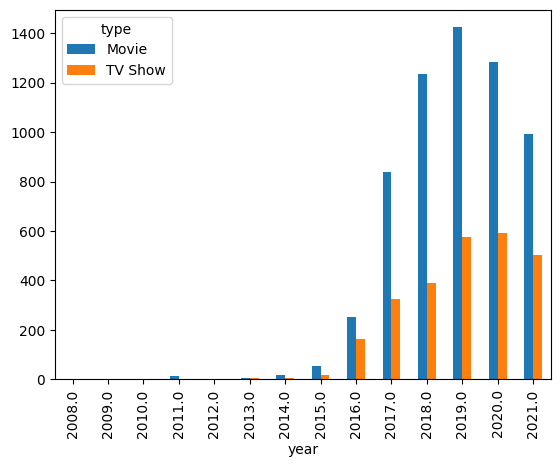

In [203]:
netflix.groupby(["year","type"]).size().unstack().fillna(0).plot(kind="bar")

In [204]:
# Top 5 directors with the most content?
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0


In [207]:
netflix.groupby("director")["title"].count().sort_values(ascending=False).head(10)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          11
Name: title, dtype: int64

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object

**IPL DATASET**

In [219]:
ipl = pd.read_csv(r"/home/rgukt/Downloads/IPL.csv")
ipl.head(3)

/tmp/ipykernel_108519/3781939704.py:1: DtypeWarning: Columns (28,29,30,31,43,46,47,48,51) have mixed types. Specify dtype option on import or set low_memory=False.
  ipl = pd.read_csv(r"/home/rgukt/Downloads/IPL.csv")


,Unnamed: 0,match_id,date,match_type,event_name,innings,batting_team,bowling_team,over,ball,...,team_runs,team_balls,team_wicket,new_batter,batter_runs,batter_balls,bowler_wicket,batting_partners,next_batter,striker_out
0,131970,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,...,1,1,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
1,131971,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,...,1,2,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
2,131972,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,...,2,2,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False


In [220]:
ipl.columns

Index(['Unnamed: 0', 'match_id', 'date', 'match_type', 'event_name', 'innings',
       'batting_team', 'bowling_team', 'over', 'ball', 'ball_no', 'batter',
       'bat_pos', 'runs_batter', 'balls_faced', 'bowler', 'valid_ball',
       'runs_extras', 'runs_total', 'runs_bowler', 'runs_not_boundary',
       'extra_type', 'non_striker', 'non_striker_pos', 'wicket_kind',
       'player_out', 'fielders', 'runs_target', 'review_batter',
       'team_reviewed', 'review_decision', 'umpire', 'umpires_call',
       'player_of_match', 'match_won_by', 'win_outcome', 'toss_winner',
       'toss_decision', 'venue', 'city', 'day', 'month', 'year', 'season',
       'gender', 'team_type', 'superover_winner', 'result_type', 'method',
       'balls_per_over', 'overs', 'event_match_no', 'stage', 'match_number',
       'team_runs', 'team_balls', 'team_wicket', 'new_batter', 'batter_runs',
       'batter_balls', 'bowler_wicket', 'batting_partners', 'next_batter',
       'striker_out'],
      dtype='object')

In [224]:
print(ipl['Unnamed: 0'].head())
print(ipl['Unnamed: 0'].is_monotonic_increasing)
print(ipl['Unnamed: 0'].is_unique)

0    131970
1    131971
2    131972
3    131973
4    131974
Name: Unnamed: 0, dtype: int64
False
True


In [225]:
ipl = ipl.drop(columns='Unnamed: 0')


In [226]:
ipl.head(3)

,match_id,date,match_type,event_name,innings,batting_team,bowling_team,over,ball,ball_no,...,team_runs,team_balls,team_wicket,new_batter,batter_runs,batter_balls,bowler_wicket,batting_partners,next_batter,striker_out
0,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,0.1,...,1,1,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
1,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,0.2,...,1,2,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
2,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,0.3,...,2,2,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False


In [227]:
# Q1: How many unique matches are there?
ipl["match_id"].nunique()

1169

In [228]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278205 entries, 0 to 278204
Data columns (total 63 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   match_id           278205 non-null  int64  
 1   date               278205 non-null  object 
 2   match_type         278205 non-null  object 
 3   event_name         278205 non-null  object 
 4   innings            278205 non-null  int64  
 5   batting_team       278205 non-null  object 
 6   bowling_team       278205 non-null  object 
 7   over               278205 non-null  int64  
 8   ball               278205 non-null  int64  
 9   ball_no            278205 non-null  float64
 10  batter             278205 non-null  object 
 11  bat_pos            278205 non-null  int64  
 12  runs_batter        278205 non-null  int64  
 13  balls_faced        278205 non-null  int64  
 14  bowler             278205 non-null  object 
 15  valid_ball         278205 non-null  int64  
 16  ru

In [232]:
# Q2: Which teams have won the most matches?
ipl.head(3)
ipl.columns
ipl["match_won_by"].value_counts().head(10)

match_won_by
Mumbai Indians                 36185
Chennai Super Kings            34371
Kolkata Knight Riders          31729
Rajasthan Royals               27466
Royal Challengers Bangalore    26801
Sunrisers Hyderabad            22183
Kings XI Punjab                20162
Delhi Daredevils               15709
Delhi Capitals                 12296
Gujarat Titans                  9000
Name: count, dtype: int64

In [244]:
# 🔸 Q3: Toss winner vs Match winner
# (ipl[ipl["toss_winner"]==ipl["match_won_by"]]).count()

# Count when toss_winner == match_won_by
(ipl['toss_winner'] == ipl['match_won_by']).sum()

# Percent of matches where toss winner won
((ipl['toss_winner'] == ipl['match_won_by']).sum() / ipl['match_id'].nunique()) * 100


np.float64(11957.9127459367)

In [233]:
ipl.columns

Index(['match_id', 'date', 'match_type', 'event_name', 'innings',
       'batting_team', 'bowling_team', 'over', 'ball', 'ball_no', 'batter',
       'bat_pos', 'runs_batter', 'balls_faced', 'bowler', 'valid_ball',
       'runs_extras', 'runs_total', 'runs_bowler', 'runs_not_boundary',
       'extra_type', 'non_striker', 'non_striker_pos', 'wicket_kind',
       'player_out', 'fielders', 'runs_target', 'review_batter',
       'team_reviewed', 'review_decision', 'umpire', 'umpires_call',
       'player_of_match', 'match_won_by', 'win_outcome', 'toss_winner',
       'toss_decision', 'venue', 'city', 'day', 'month', 'year', 'season',
       'gender', 'team_type', 'superover_winner', 'result_type', 'method',
       'balls_per_over', 'overs', 'event_match_no', 'stage', 'match_number',
       'team_runs', 'team_balls', 'team_wicket', 'new_batter', 'batter_runs',
       'batter_balls', 'bowler_wicket', 'batting_partners', 'next_batter',
       'striker_out'],
      dtype='object')

In [245]:
 # Q4: Most common venues
ipl["venue"].value_counts().head(10)

venue
Eden Gardens                                  17988
Wankhede Stadium                              17591
M Chinnaswamy Stadium                         14907
Feroz Shah Kotla                              13950
Wankhede Stadium, Mumbai                      12547
MA Chidambaram Stadium, Chepauk               11760
Rajiv Gandhi International Stadium, Uppal     11604
Dubai International Cricket Stadium           11229
Sawai Mansingh Stadium                        11150
Punjab Cricket Association Stadium, Mohali     8266
Name: count, dtype: int64

In [247]:
# 🔸 Q5: Matches per season
ipl.groupby("season")["match_id"].nunique().sort_values(ascending=False)

season
2013       76
2012       74
2022       74
2025       74
2023       74
2024       71
2018       60
2020/21    60
2009/10    60
2014       60
2016       60
2017       59
2015       59
2007/08    58
2021       48
2011       42
2009       35
2011       32
2019       31
2019       30
2009       24
2021       13
Name: match_id, dtype: int64

In [248]:
# 🔸 Q6: Player of the Match frequency
ipl["player_of_match"].value_counts()

player_of_match
AB de Villiers    6170
CH Gayle          5186
RG Sharma         5134
MS Dhoni          4384
DA Warner         4329
                  ... 
WD Parnell         189
Ashwani Kumar      182
M Jansen           154
Suyash Sharma      147
DL Vettori         108
Name: count, Length: 309, dtype: int64

**Practicing Pivot,Melt,stck & unstack**

In [264]:
df=pd.read_csv(r"/home/rgukt/Downloads/SuperMarket Analysis.csv")
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6


In [263]:
df["Payment_Type"].value_counts()

Payment_Type
Cash              164311
ATM card           61192
Mobile payment      5908
Gift card           3035
Check                479
Name: count, dtype: int64

In [265]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [268]:
# Q1. Average Sales by Gender and Product line
df.pivot_table(index="Gender",columns="Product line",values="Sales",aggfunc="mean")

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Gender,,,,,,
Female,332.199000,314.07075,372.099964,304.139318,370.555846,348.741597
Male,304.089809,291.23220,258.934836,343.666820,291.903348,304.800667


In [273]:
# Q2. Total Quantity by City and Payment
df["City"].value_counts()
df.pivot_table(index="City", columns="Payment",values="Quantity",aggfunc="sum")

Payment,Cash,Credit card,Ewallet
City,,,
Mandalay,628,599,593
Naypyitaw,696,543,592
Yangon,572,580,707


In [278]:
df.groupby(["City","Payment"])["Quantity"].sum().unstack()

Payment,Cash,Credit card,Ewallet
City,,,
Mandalay,628,599,593
Naypyitaw,696,543,592
Yangon,572,580,707


In [272]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6


In [276]:
df.groupby(["Gender","Product line"])["Sales"].mean().unstack()

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Gender,,,,,,
Female,332.199000,314.07075,372.099964,304.139318,370.555846,348.741597
Male,304.089809,291.23220,258.934836,343.666820,291.903348,304.800667


In [280]:
# Q3. Average gross income and Sales by Branch
df.pivot_table(index="Branch",values=["gross income","Sales"],aggfunc="mean")

,Sales,gross income
Branch,,
Alex,312.354031,14.874001
Cairo,319.872506,15.232024
Giza,337.099715,16.052367


In [281]:
df.groupby("Branch")[["Sales","gross income"]].mean()

,Sales,gross income
Branch,,
Alex,312.354031,14.874001
Cairo,319.872506,15.232024
Giza,337.099715,16.052367


In [283]:
melted=df.melt(id_vars=["Invoice ID","Product line"], value_vars=["Unit price","Quantity","Sales"],var_name="Metric",value_name="Value")
melted

,Invoice ID,Product line,Metric,Value
0,750-67-8428,Health and beauty,Unit price,74.6900
1,226-31-3081,Electronic accessories,Unit price,15.2800
2,631-41-3108,Home and lifestyle,Unit price,46.3300
3,123-19-1176,Health and beauty,Unit price,58.2200
4,373-73-7910,Sports and travel,Unit price,86.3100
...,...,...,...,...
2995,233-67-5758,Health and beauty,Sales,42.3675
2996,303-96-2227,Home and lifestyle,Sales,1022.4900
2997,727-02-1313,Food and beverages,Sales,33.4320
2998,347-56-2442,Home and lifestyle,Sales,69.1110


In [285]:
# Q5. After melt, show average of each metric
melted.groupby("Metric")["Value"].mean().reset_index()

,Metric,Value
0,Quantity,5.510000
1,Sales,322.966749
2,Unit price,55.672130


In [288]:
# Q6. Total Sales by Gender and Payment, then unstack to reshape
df.groupby(["Gender","Payment"])["Sales"].sum().unstack()

Payment,Cash,Credit card,Ewallet
Gender,,,
Female,69347.2395,61165.608,64158.990
Male,42859.3305,39601.464,45834.117


In [293]:
# Q7. Extract month from Date and get total Sales per Product line per month

df["Date"]=pd.to_datetime(df["Date"], errors="coerce")
df["Date"].dtype

dtype('<M8[ns]')

In [296]:
print(df["Date"].dtype)

datetime64[ns]


In [299]:
df["Month"]=df["Date"].dt.month_name()

In [300]:
df["Month"]

0       January
1         March
2         March
3       January
4      February
         ...   
995     January
996       March
997    February
998    February
999    February
Name: Month, Length: 1000, dtype: object

In [301]:
df.pivot_table(index="Month",columns="Product line", values="Sales", aggfunc="sum")

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Month,,,,,,
February,17362.9050,19009.8615,20000.358,14602.2555,12434.3835,13809.6105
January,18831.2880,19345.1160,19570.530,16383.1710,20494.7400,21667.0230
March,18143.3385,15950.9175,16573.956,18208.3125,20932.7895,19646.1930


In [304]:
unstack=df.groupby(["Month","Product line"])["Sales"].sum().unstack()
unstack

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Month,,,,,,
February,17362.9050,19009.8615,20000.358,14602.2555,12434.3835,13809.6105
January,18831.2880,19345.1160,19570.530,16383.1710,20494.7400,21667.0230
March,18143.3385,15950.9175,16573.956,18208.3125,20932.7895,19646.1930
